In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
x_train.shape

(60000, 28, 28)

Parseamos los datos para que sea 28 * 28 en Vez de 3 dimensiones a ser 2

In [36]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [37]:
X_train.shape

(60000, 784)

Dividimos entre la gama de 255

In [38]:
X_train = X_train/255.0
X_test = X_test/255.0

In [39]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Dependiendo si es par lo parseamos a 0 - 1 el booleano el resultado

In [40]:
y_train = (y_train%2 == 0).astype(int)
y_test  = (y_test%2 == 0).astype(int)

In [41]:
y_train

array([0, 1, 1, ..., 0, 1, 1])

Marcamos las dimensiones para poder indicar en la red neuronal

In [42]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
dimension_entrada

784

In [43]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

Decimos que utilizaremos un Sequential y utilizaremos el Sigmoide para intervalos próximos a 0-1

In [44]:
modelo = Sequential()
modelo.add(Dense(32,activation="relu",input_dim=dimension_entrada))
modelo.add(Dense(1, activation="sigmoid"))
sgd=SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

Definimos el modelo que entrenamos

In [51]:
epochs = 20
batch_size = 20
checkpoint_cb = keras.callbacks.ModelCheckpoint(path+'model_keras_callbacks.keras',save_best_only=True)
history = modelo.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test),callbacks=[checkpoint_cb])

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9815 - val_loss: 0.0648
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 951us/step - accuracy: 0.9964 - loss: 0.0126 - val_accuracy: 0.9827 - val_loss: 0.0570
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9835 - val_loss: 0.0561
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9837 - val_loss: 0.0541
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9826 - val_loss: 0.0571
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9847 - val_loss: 0.0545
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step - accuracy: 0.9984 - loss: 0.0069 - val_accuracy: 0.9835 - val_loss: 0.0595
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9982 -

<Axes: >

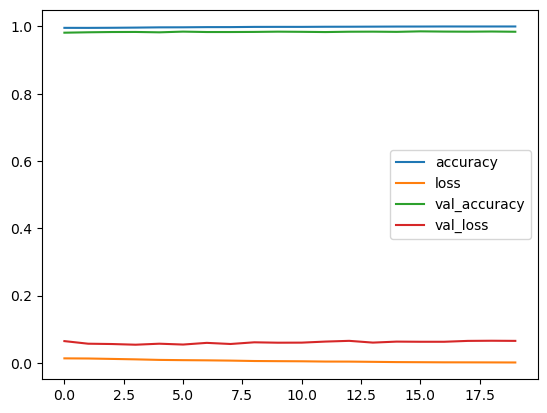

In [52]:
pd.DataFrame(history.history).plot()

Y hacemos una prueba de predicción para ver los valores parejos

In [53]:
X_nueva = X_test[:10]
y_pred = modelo.predict(X_nueva)

print(y_pred,y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.6445115e-09]
 [9.9995625e-01]
 [2.0718342e-05]
 [1.0000000e+00]
 [9.9987245e-01]
 [2.2376005e-06]
 [9.9999994e-01]
 [4.8916701e-07]
 [9.9963725e-01]
 [1.2286841e-08]] [0 1 0 1 1 0 1 0 0 0]


In [54]:
import pathlib

path=str(pathlib.Path().resolve())

In [55]:
import os
root_logdir = os.path.join(path, "my_logs")
#modelo.compile(loss="binary_crossentropy", optimizer=sgd,  metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
epochs = 6
batch_size = 20
historia = modelo.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[tensorboard_cb],
                      validation_data = (X_test, y_test))

Epoch 1/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9839 - val_loss: 0.0668
Epoch 2/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 9.8572e-04 - val_accuracy: 0.9842 - val_loss: 0.0663
Epoch 3/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 9.5694e-04 - val_accuracy: 0.9845 - val_loss: 0.0668
Epoch 4/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 9.1697e-04 - val_accuracy: 0.9852 - val_loss: 0.0664
Epoch 5/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 8.2245e-04 - val_accuracy: 0.9845 - val_loss: 0.0688
Epoch 6/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 8.5114e-04 - val_accuracy: 0.9847 - val_loss: 0.0686


In [56]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13672), started 0:10:36 ago. (Use '!kill 13672' to kill it.)